In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#TESTING

import os

import tensorflow as tf

print(tf.version.VERSION)

import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math  
import datetime
import time 
from keras.layers import LeakyReLU
import os

vgg16 = applications.VGG16(include_top=False, weights='imagenet')
model = tf.keras.models.load_model('/content/gdrive/My Drive/models/vgg19/Best_model.h5')
batch_size = 8
img_width, img_height = 224, 224 
datagen = ImageDataGenerator(rescale=1. / 255) 
test_data_dir = '/content/gdrive/My Drive/Gdrive/test/'

#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
    
def test_single_image(path):
    view = ['Halal','Haram','meragukan']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, view, x in zip(range(len(view)), view , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, view, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)
 
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      return name

2.3.0
Found 74 images belonging to 3 classes.


Saving 126251656_3612933158766298_5304643901839685328_o.jpg to 126251656_3612933158766298_5304643901839685328_o.jpg
saved file 126251656_3612933158766298_5304643901839685328_o.jpg
[INFO] loading and preprocessing image...
Instructions for updating:
Please use `model.predict()` instead.
ID: 0, Label: Halal 97.45%
ID: 1, Label: Haram 0.94%
ID: 2, Label: meragukan 1.61%
Final Decision:
.
..
...
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
ID: 0, Label: Halal


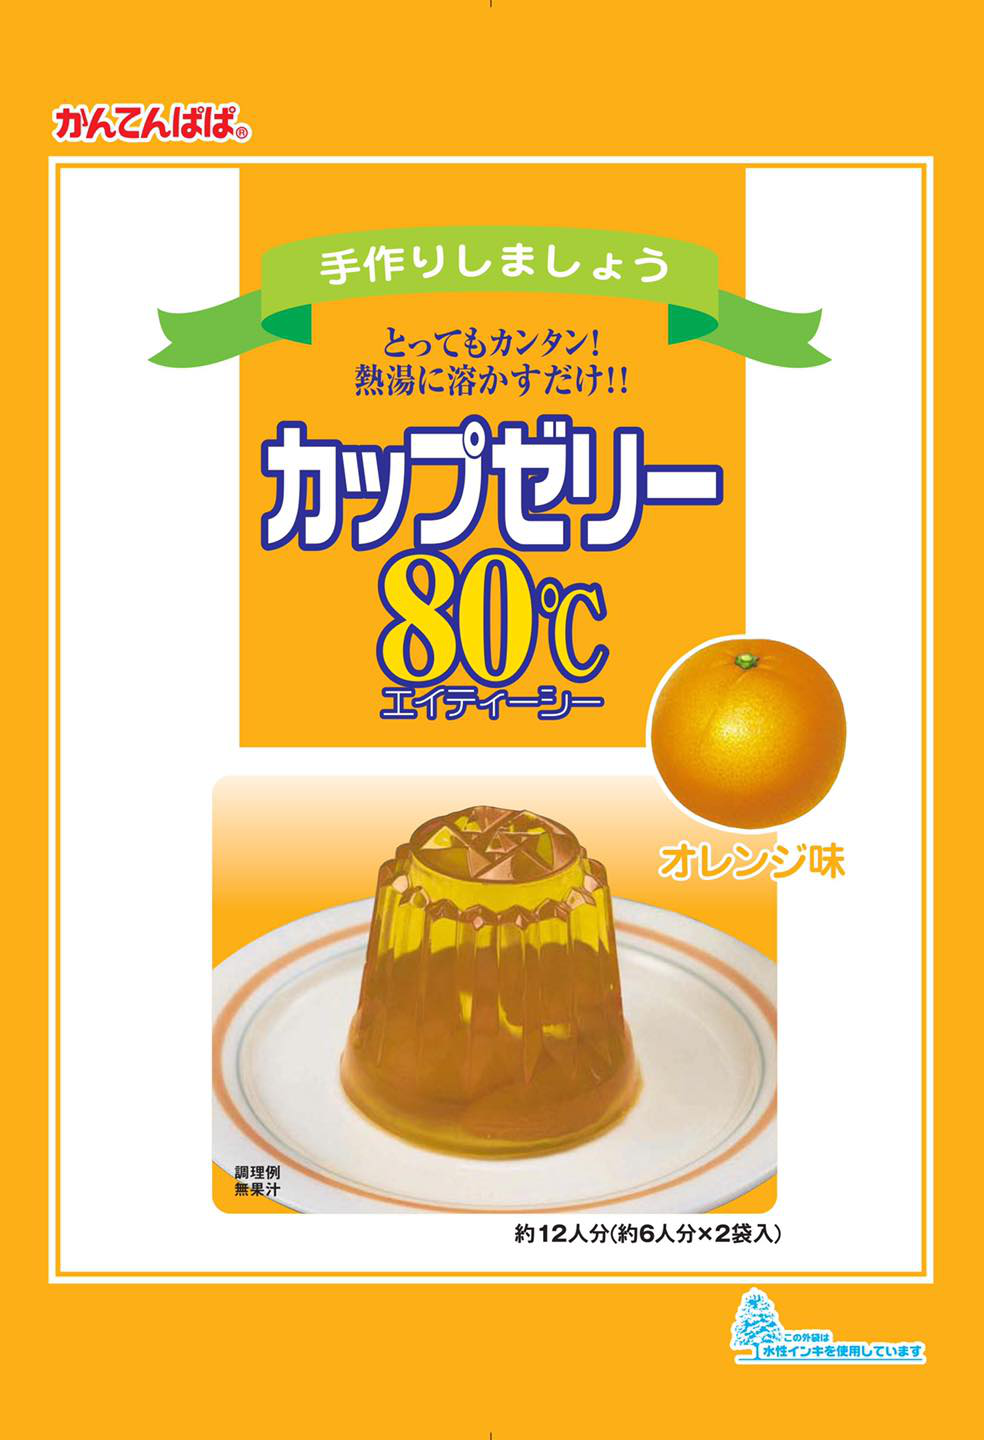

In [4]:
name = upload()
path = str(name)
test_single_image(path)